<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> SVM regressor 1  </h1>
</div>
<div style="line-height:0.5">
<h4> Support Vector Machines for regression
</h4>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> pyplot subplots + metrics for regressiondecoratormatplotlib styles
</span>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

Text(0.5, 1.0, 'Device Sales Data')

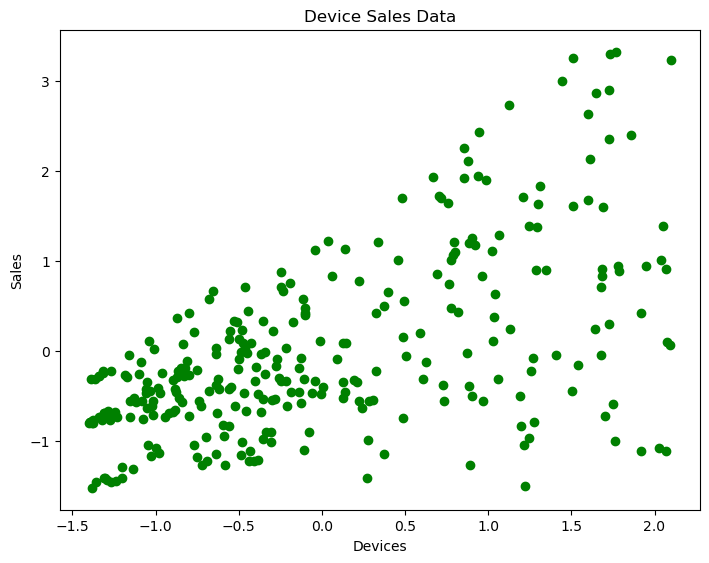

In [2]:
dataset = pd.read_csv('./updated_data.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Scale feature
st_x = StandardScaler()
st_y = StandardScaler()

X = st_x.fit_transform(x)
# Reshape the y array into a 2D array + standard scaling transformation + convert back to 1D array
Y = st_y.fit_transform(y.reshape(-1, 1)).flatten()  

###### Visualize data
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X, Y, color='g')
ax.set_xlabel('Devices')
ax.set_ylabel('Sales')
ax.set_title('Device Sales Data')

### => Trying different kernels

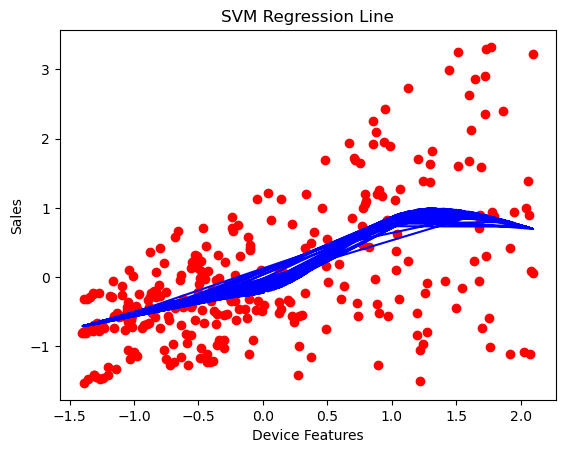

In [3]:
## Train
regressor = SVR()  #default kernel='rbf'
regressor.fit(X, Y)

###### Visualize the SVM regression line
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Device Features')
plt.ylabel('Sales')
plt.title('SVM Regression Line with RBF kernel')
plt.show()

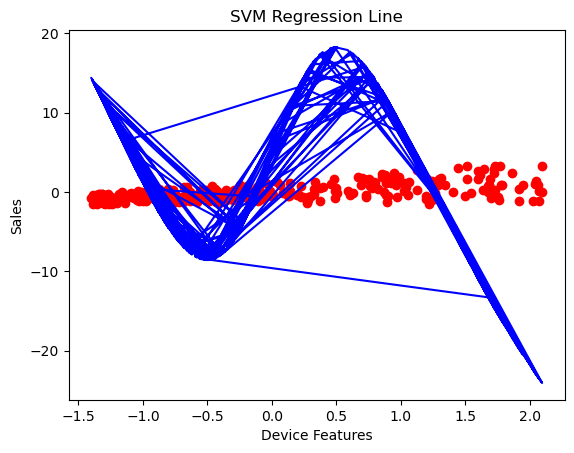

In [4]:
## Train
regressor = SVR(kernel='sigmoid')
regressor.fit(X, Y)

###### Visualize the SVM regression line
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Device Features')
plt.ylabel('Sales')
plt.title('SVM Regression Line with Sigmoid kernel')
plt.show()

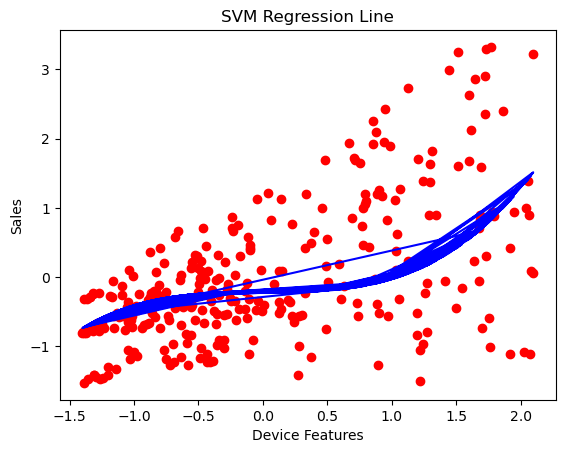

In [5]:
## Train
regressor = SVR(kernel='poly')
regressor.fit(X, Y)

## Visualize the SVM regression line
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Device Features')
plt.ylabel('Sales')
plt.title('SVM Regression Line with Poly kernel')
plt.show()

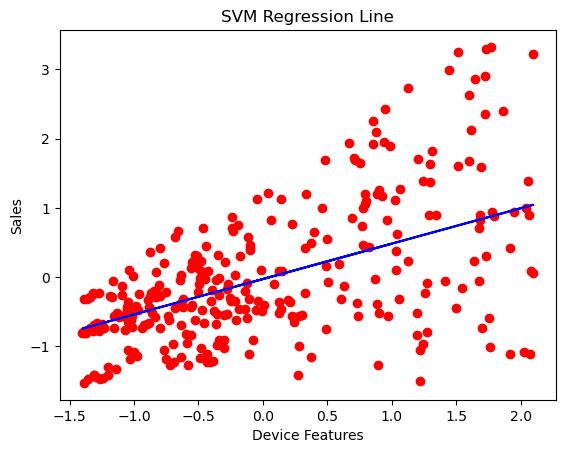

In [6]:
## Training
regressor = SVR(kernel='linear')
regressor.fit(X, Y)

####### Visualize the SVM regression line
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Device Features')
plt.ylabel('Sales')
plt.title('SVM Regression Line with Linear kernel')
plt.show()

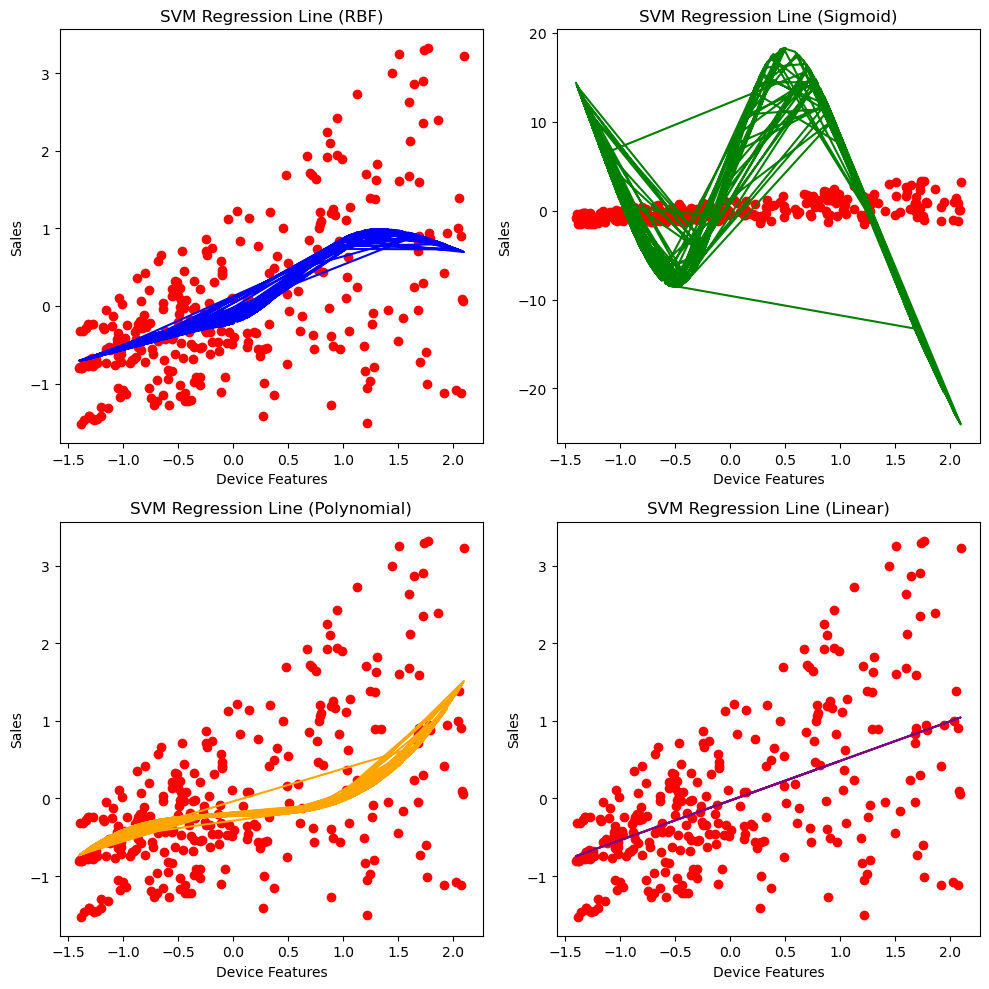

In [7]:
"""" All plots together """

## Training SVM regressors with different kernels
regressor1 = SVR()
regressor1.fit(X, Y)
regressor2 = SVR(kernel='sigmoid')
regressor2.fit(X, Y)
regressor3 = SVR(kernel='poly')
regressor3.fit(X, Y)
regressor4 = SVR(kernel='linear')
regressor4.fit(X, Y)

############### Display all plots 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].scatter(X, Y, color='red')
axes[0, 0].plot(X, regressor1.predict(X), color='blue')
axes[0, 0].set_xlabel('Device Features')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].set_title('SVM Regression Line (RBF)')

axes[0, 1].scatter(X, Y, color='red')
axes[0, 1].plot(X, regressor2.predict(X), color='green')
axes[0, 1].set_xlabel('Device Features')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].set_title('SVM Regression Line (Sigmoid)')

axes[1, 0].scatter(X, Y, color='red')
axes[1, 0].plot(X, regressor3.predict(X), color='orange')
axes[1, 0].set_xlabel('Device Features')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].set_title('SVM Regression Line (Polynomial)')

axes[1, 1].scatter(X, Y, color='red')
axes[1, 1].plot(X, regressor4.predict(X), color='purple')
axes[1, 1].set_xlabel('Device Features')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].set_title('SVM Regression Line (Linear)')

plt.tight_layout()
plt.show()


In [11]:
y_pred = regressor1.predict(X).reshape(1, -1)
y_pred[:10]

array([[-0.2748712 , -0.22640576, -0.27734791, -0.28328997, -0.28272503,
        -0.27569503, -0.2872946 , -0.25863658, -0.28457691, -0.26368928,
        -0.30575848, -0.28958677, -0.41341154, -0.29274742, -0.25918649,
        -0.27802951, -0.28485399, -0.15058814, -0.33170177, -0.29097053,
        -0.28843285, -0.28001563, -0.26627988, -0.28347733, -0.0638502 ,
        -0.2962603 , -0.43350242, -0.28777882, -0.23962722, -0.28772496,
         0.25712847, -0.2849983 , -0.25150047, -0.06438969, -0.26708843,
         0.21389659, -0.31149306,  0.66954222, -0.14145974, -0.09546609,
        -0.29868771, -0.26035069, -0.2194496 , -0.25990731, -0.29353228,
        -0.31903222, -0.28782538, -0.00910168, -0.30040175, -0.04790416,
         0.66511439, -0.2849983 , -0.28698967, -0.28719691, -0.2971213 ,
        -0.31812846,  0.04333731, -0.24574188, -0.28847116, -0.29549899,
         0.09967145,  0.99075977,  0.13030391,  0.09967145,  0.75661473,
         0.98835942,  0.94921569,  0.54017098,  0.0

In [12]:
y = Y.reshape(-1, 1)
# Scale back data to original representation
pred = st_y.inverse_transform(y_pred)
print(y[:10])
print(pred[:10])

[[-0.46212204]
 [-0.48631903]
 [-0.61940243]
 [-0.17175825]
 [-0.0991673 ]
 [ 0.7477271 ]
 [-0.01447786]
 [ 0.42106783]
 [ 0.21539348]
 [-0.08706881]
 [ 0.3242799 ]
 [-0.48631903]
 [-0.28064467]
 [ 0.08231007]
 [ 0.4694618 ]
 [-0.34113713]
 [-0.54681148]
 [-0.5226145 ]
 [-0.3774326 ]
 [-0.34113713]
 [-0.03867484]
 [ 0.66303766]
 [-0.46212204]
 [-0.53471299]
 [ 0.77192408]
 [ 0.0339161 ]
 [-0.23225071]
 [-0.53471299]
 [-0.34113713]
 [ 0.3242799 ]
 [-0.75248584]
 [-1.01865265]
 [-0.90976623]
 [-0.55890997]
 [-0.19595523]
 [ 1.00179542]
 [-0.42582657]
 [ 1.20746977]
 [-0.46212204]
 [-0.32903864]
 [-1.01865265]
 [-0.31694015]
 [-0.40162959]
 [-1.10334209]
 [-1.11544058]
 [-0.82507679]
 [-0.98235717]
 [-0.99445567]
 [-0.0991673 ]
 [-0.64359941]
 [ 1.06228787]
 [-0.90976623]
 [-0.90976623]
 [-0.25644769]
 [-0.47422054]
 [-0.9460617 ]
 [-0.23225071]
 [-0.47422054]
 [-0.67989489]
 [-0.6677964 ]
 [ 0.49365878]
 [ 1.37684865]
 [ 0.65093917]
 [-1.15173605]
 [-0.02657635]
 [-0.05077334]
 [ 0.23959

In [13]:
pred = y_pred.flatten()
print(len(Y))
print(len(y_pred))
print(len(pred))


300
1
300


<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> <u>Metrics for Regression </u> </h2>
</div>

Mean Absolute Error (MAE): <br>
The MAE is a measure of the average absolute difference between the predicted and actual values in a regression problem. <br>
It is calculated as the mean of the absolute differences between the predicted and actual values. <br>
The MAE provides a measure of the accuracy of the model's predictions, with lower values indicating better performance.

Mean Squared Error (MSE): <br>
The MSE is a measure of the average squared difference between the predicted and actual values in a regression problem. <br>
It is calculated as the mean of the squared differences between the predicted and actual values. <br>
The MSE provides a measure of the overall error of the model's predictions, with lower values indicating better performance.

Root Mean Squared Error (RMSE): <br>
The RMSE is a measure of the average distance between the predicted and actual values in a regression problem. <br>
It is calculated as the square root of the MSE. <br>
The RMSE is a more interpretable metric than the MSE because it is expressed in the same units as the target variable.

R-squared (R2): <br>
The R-squared is a measure of how well the regression model fits the data. <br>
It is calculated as the ratio of the explained variance to the total variance. <br>
The R-squared ranges from 0 to 1, with higher values indicating better fit. <br>
An R-squared of 1 indicates that the model perfectly fits the data, while an R-squared of 0 indicates that the model <br> does not explain any of the variance in the data.

Mean Absolute Percentage Error (MAPE): <br>
The MAPE measures the percentage difference between the predicted and actual values. <br>
It is calculated as the mean of the absolute percentage difference between the predicted and actual values.

Normalized Root Mean Squared Error (NRMSE): <br>
The NRMSE is a normalized version of the RMSE that scales the error by the range of the target variable. <br>
It is calculated as the RMSE divided by the range of the target variable.

Coefficient of Determination (R-squared): <br>
The R-squared measures the proportion of variance in the target variable that is explained by the regression model. <br>
It is calculated as the ratio of the explained variance to the total variance.

Mean Percentage Error (MPE): <br>
The MPE measures the average percentage difference between the predicted and actual values. <br>
It is calculated as the mean of the percentage difference between the predicted and actual values.

Mean Absolute Deviation (MAD): <br>
The MAD is a measure of the average absolute difference between the predicted and actual values. <br>
It is calculated as the mean of the absolute difference between the predicted and actual values.

Mean Signed Deviation (MSD): <br>
The MSD is a measure of the average signed difference between the predicted and actual values. <br>
It is calculated as the mean of the signed difference between the predicted and actual values.

Explained Variance Score (EV): <br>
The EV measures the proportion of variance in the target variable that is explained by the regression model. <br>
It is calculated as 1 minus the ratio of the residual variance to the total variance.

In [14]:
mae = mean_absolute_error(Y, pred)      # Mean Absolute Error
mse = mean_squared_error(Y, pred)       # Mean Squared Error 
rmse = np.sqrt(mse)                     # Root Mean Squared Error
r2 = r2_score(Y, pred)                  # R-squared

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.6014034919174001
MSE: 0.6557905533481729
RMSE: 0.8098089610199266
R2: 0.34420944665182707


In [15]:
mape = mean_absolute_percentage_error(Y, pred)  # Mean Absolute Percentage Error
nrmse = rmse / (Y.max() - Y.min())              # Normalized Root Mean Squared Error 
mpe = np.mean((Y - pred) / Y) * 100             # Mean Percentage Error 
mad = np.mean(np.abs(Y - pred))                 # Mean Absolute Deviation 
msd = np.mean(Y - pred)                         # Mean Signed Deviation 
ev = explained_variance_score(Y, pred)          # Explained Variance Score 

print("MAPE:", mape)
print("NRMSE:", nrmse)
print("MPE:", mpe)
print("MAD:", mad)
print("MSD:", msd)
print("EV:", ev)

MAPE: 1.7333059453917736
NRMSE: 0.16691946536198998
MPE: 72.43242402819224
MAD: 0.6014034919174001
MSD: -0.0066339036173014895
EV: 0.3442534553290305
